For info about [the dataset](https://www.openpowerlifting.org/data), view README.txt.

    This page uses data from the OpenPowerlifting project, https://www.openpowerlifting.org.
    You may download a copy of the data at https://gitlab.com/openpowerlifting/opl-data.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
sns.set_theme()

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 8, 8

In [22]:
df = pd.read_csv("openpowerlifting-2020-12-13.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'Federation', 'ParentFederation',
       'Date', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName'],
      dtype='object')

<AxesSubplot:>

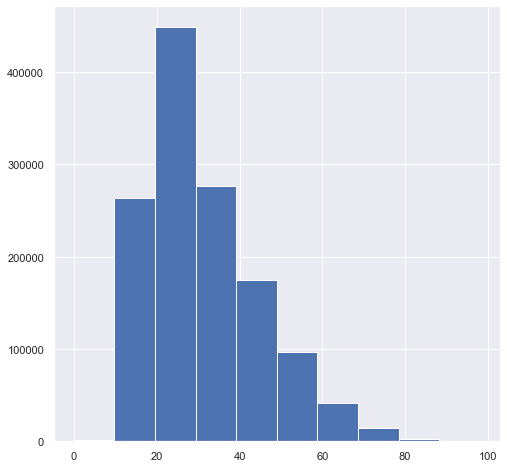

In [18]:
df.Age.hist()

Convert country 'England' to 'UK' for consistency:

In [23]:
df.loc[df['Country'] == 'England', 'Country'] = 'UK'

<AxesSubplot:title={'center':'Top 15 Countries by Powerlifting Record Count'}>

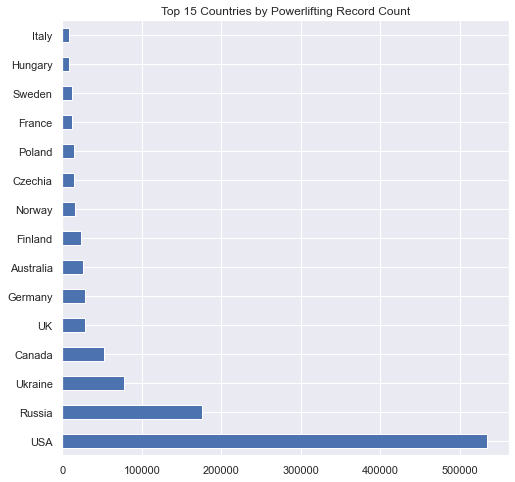

In [6]:
df['Country'].value_counts().nlargest(15).plot(kind='barh', grid=True, title='Top 15 Countries by Powerlifting Record Count')

In [20]:
top_countries = df['Country'].value_counts().nlargest(15).index.to_list()

In [21]:
df['Tested'] = df['Tested'].fillna('No')

<AxesSubplot:ylabel='Country'>

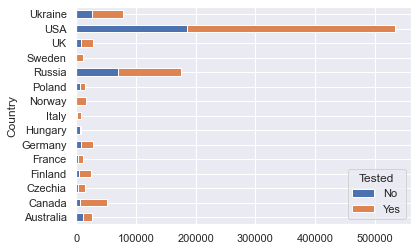

In [80]:
df2 = df[df['Country'].isin(top_countries)].groupby(['Country', 'Tested'])['Country'].count().unstack('Tested')
df2.plot(kind='barh', stacked=True)

In [35]:
df2['Tested_Percentage'] = df2['Yes']/(df2['Yes'] + df2['No'])

In [41]:
df2.Tested_Percentage.sort_values()

Country
Hungary      0.238151
Poland       0.562671
Australia    0.567136
Russia       0.602363
USA          0.653737
Ukraine      0.662426
Germany      0.718403
UK           0.743066
Czechia      0.765851
France       0.779338
Finland      0.786626
Canada       0.891796
Italy        0.920364
Sweden       0.969733
Norway       0.994790
Name: Tested_Percentage, dtype: float64

In [43]:
df2.Tested_Percentage.sort_values?

<AxesSubplot:title={'center':'Countries by Drug Testing Rate'}, ylabel='Country'>

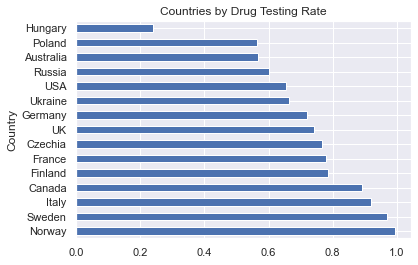

In [46]:
df2['Tested_Percentage'].sort_values(ascending=False).plot(kind='barh', stacked=True, title='Countries by Drug Testing Rate')

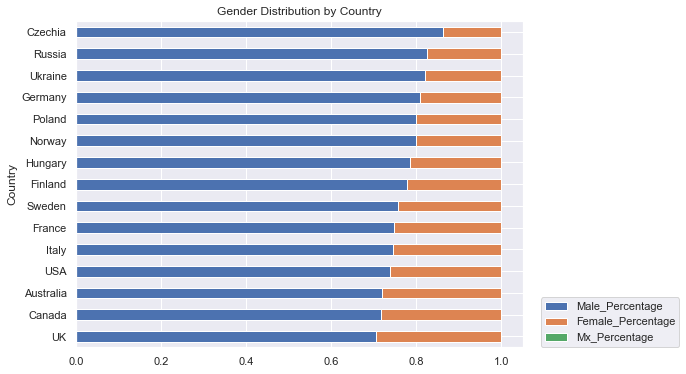

In [77]:
df3 = df[df['Country'].isin(top_countries)].groupby(['Country', 'Sex'])['Country'].count().unstack('Sex').fillna(0)

df3['Male_Percentage'] = df3['M']/(df3['M'] + df3['F'] + df3['Mx'])
df3['Female_Percentage'] = df3['F']/(df3['M'] + df3['F'] + df3['Mx'])
df3['Mx_Percentage'] = df3['Mx']/(df3['M'] + df3['F'] + df3['Mx'])
df3[['Male_Percentage', 'Female_Percentage', 'Mx_Percentage']].sort_values(by=['Male_Percentage']).plot(kind='barh', stacked=True, figsize=(8,6), title='Gender Distribution by Country')
plt.legend(loc=(1.04,0))

Text(0.5, 0.98, '')

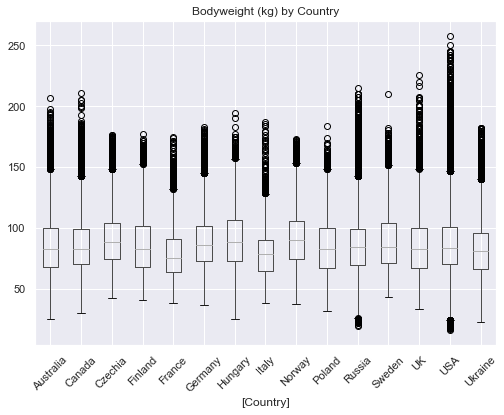

In [12]:
df[df['Country'].isin(top_countries)].boxplot(column=['BodyweightKg'], by=['Country'], rot =45, figsize=(8,6))
plt.title('Bodyweight (kg) by Country')
plt.suptitle('')

Text(0.5, 0.98, '')

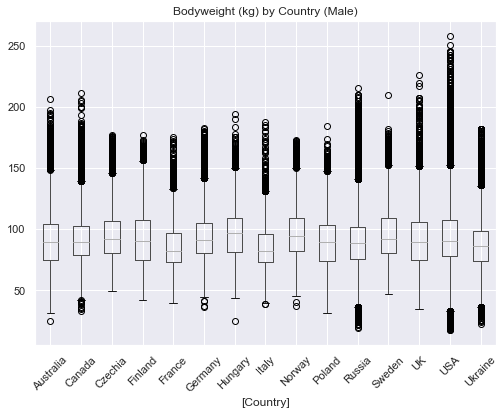

In [14]:
df[(df['Country'].isin(top_countries)) & (df['Sex'] == 'M')].boxplot(column=['BodyweightKg'], by=['Country'], rot =45, figsize=(8,6))
plt.title('Bodyweight (kg) by Country (Male)')
plt.suptitle('')

Text(0.5, 0.98, '')

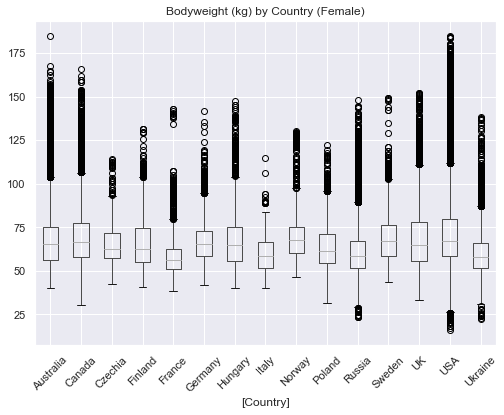

In [15]:
df[(df['Country'].isin(top_countries)) & (df['Sex'] == 'F')].boxplot(column=['BodyweightKg'], by=['Country'], rot =45, figsize=(8,6))
plt.title('Bodyweight (kg) by Country (Female)')
plt.suptitle('')

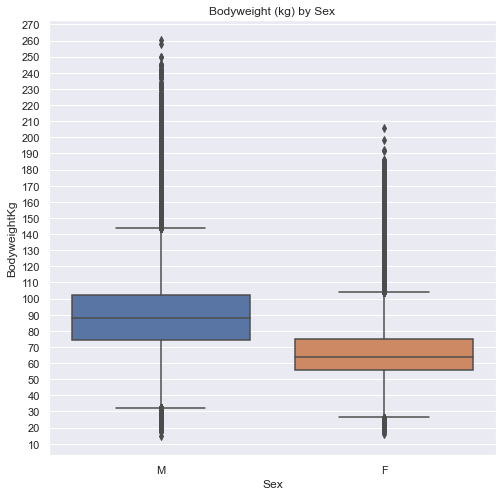

In [43]:
ax = sns.boxplot(x='Sex', y='BodyweightKg', data = df[df['Sex'].isin(['M', 'F'])])
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Bodyweight (kg) by Sex')
plt.suptitle('')
plt.show()

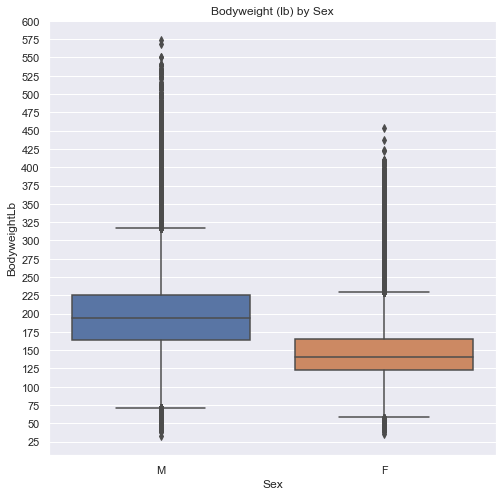

In [44]:
df['BodyweightLb'] = df['BodyweightKg'] * 2.20462
ax = sns.boxplot(x='Sex', y='BodyweightLb', data = df[df['Sex'].isin(['M', 'F'])])
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Bodyweight (lb) by Sex')
plt.suptitle('')
plt.show()

Heaviest powerlifter on record:

In [22]:
df[df['BodyweightKg'] == df['BodyweightKg'].max()].T

,1311558
Name,James Simmons #1
Sex,M
Event,B
Equipment,Raw
Age,31
AgeClass,24-34
BirthYearClass,24-39
Division,M_OR_AAPF
BodyweightKg,260.2
WeightClassKg,140+


In [34]:
df4 = df[df['Date'] > '2015-01-01'].groupby(['Date']).count()
df4.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Glossbrenner,Goodlift,Tested,Country,Federation,ParentFederation,MeetCountry,MeetState,MeetTown,MeetName
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-03,199,199,199,199,167,171,168,199,199,199,...,190,190,199,160,199,166,199,33,199,199
2015-01-07,124,124,124,124,13,46,21,124,124,124,...,106,106,124,15,124,0,124,124,124,124
2015-01-08,448,448,448,448,265,305,273,448,448,448,...,410,407,448,273,448,255,448,193,448,448
2015-01-09,152,152,152,152,152,152,152,152,152,152,...,151,151,152,107,152,152,152,0,152,152
2015-01-10,3037,3037,3037,3037,726,1344,809,3037,3022,3026,...,2732,2575,2658,791,3037,537,3037,2986,2905,3037


<AxesSubplot:title={'center':'Powerlifting Participation by Date'}, xlabel='Date'>

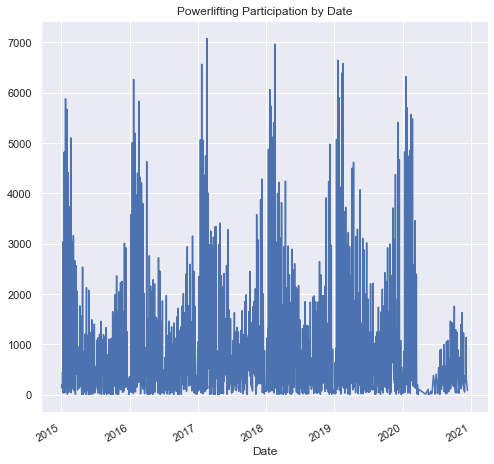

In [37]:
df4['Name'].plot(kind='line', title='Powerlifting Participation by Date')